# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# import Dependencies
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
from api_keys import weather_api_key
from citipy import citipy

## Generate Cities List

In [2]:
# Generate coordinates
cities = []
coordinates = []
lat = np.random.uniform(-90, 90, size = 1600)
lng = np.random.uniform(-180, 80, size = 1600)
coordinates = zip(lat, lng)

# Find nearest city using citipy
for coord in coordinates:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    if city not in cities:
        cities.append(city)
# Check number of cities        
len(cities)

573

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base url
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

city_name = []
temp = []
lat = []
humidity = []
cloudiness = []
wind = []

count = 0

# Request info for each city and append to respective list
for city in cities:
    try:
        city_info = requests.get(url+city.replace(" ", "&")).json()
        city_name.append(city_info['name'])
        lat.append(city_info['coord']['lat'])
        temp.append(city_info['main']['temp'])
        humidity.append(city_info['main']['humidity'])
        cloudiness.append(city_info['clouds']['all'])
        wind.append(city_info['wind']['speed'])
        count += 1
        print(f"City found. Adding stats for record {count}... | {city}")
    except:
        print(f"City not found. Skipping...")

City found. Adding stats for record 1... | narsaq
City not found. Skipping...
City found. Adding stats for record 2... | opuwo
City found. Adding stats for record 3... | taltal
City found. Adding stats for record 4... | gravdal
City found. Adding stats for record 5... | avarua
City found. Adding stats for record 6... | klaksvik
City found. Adding stats for record 7... | caravelas
City not found. Skipping...
City found. Adding stats for record 8... | bilma
City found. Adding stats for record 9... | lebu
City found. Adding stats for record 10... | mataura
City found. Adding stats for record 11... | arlit
City found. Adding stats for record 12... | saldanha
City found. Adding stats for record 13... | jamestown
City found. Adding stats for record 14... | castro
City found. Adding stats for record 15... | bandarbeyla
City not found. Skipping...
City found. Adding stats for record 16... | chapleau
City found. Adding stats for record 17... | ribeira grande
City found. Adding stats for record 

City found. Adding stats for record 146... | vestmannaeyjar
City found. Adding stats for record 147... | roald
City found. Adding stats for record 148... | dikson
City found. Adding stats for record 149... | cape canaveral
City found. Adding stats for record 150... | victoria
City found. Adding stats for record 151... | fortuna
City found. Adding stats for record 152... | xuddur
City found. Adding stats for record 153... | nikki
City not found. Skipping...
City found. Adding stats for record 154... | mana
City found. Adding stats for record 155... | gonen
City found. Adding stats for record 156... | delaware
City found. Adding stats for record 157... | embu
City found. Adding stats for record 158... | qaanaaq
City found. Adding stats for record 159... | lubango
City found. Adding stats for record 160... | georgetown
City not found. Skipping...
City found. Adding stats for record 161... | ponta delgada
City not found. Skipping...
City found. Adding stats for record 162... | faya
City no

City found. Adding stats for record 288... | kyabe
City found. Adding stats for record 289... | mabaruma
City found. Adding stats for record 290... | kochubey
City not found. Skipping...
City found. Adding stats for record 291... | guisa
City found. Adding stats for record 292... | fort nelson
City found. Adding stats for record 293... | tambopata
City found. Adding stats for record 294... | livanatai
City found. Adding stats for record 295... | fort smith
City not found. Skipping...
City found. Adding stats for record 296... | rocha
City found. Adding stats for record 297... | bahia de caraquez
City found. Adding stats for record 298... | gainesville
City found. Adding stats for record 299... | derzhavinsk
City found. Adding stats for record 300... | viking
City found. Adding stats for record 301... | san quintin
City found. Adding stats for record 302... | marystown
City found. Adding stats for record 303... | gra liyia
City found. Adding stats for record 304... | palmer
City found. 

City found. Adding stats for record 431... | dakar
City found. Adding stats for record 432... | heviz
City not found. Skipping...
City not found. Skipping...
City found. Adding stats for record 433... | leticia
City found. Adding stats for record 434... | kongsberg
City found. Adding stats for record 435... | tombouctou
City found. Adding stats for record 436... | grindavik
City not found. Skipping...
City found. Adding stats for record 437... | salinopolis
City found. Adding stats for record 438... | karakol
City found. Adding stats for record 439... | bathsheba
City found. Adding stats for record 440... | ishim
City found. Adding stats for record 441... | morant bay
City found. Adding stats for record 442... | lucapa
City found. Adding stats for record 443... | lompoc
City found. Adding stats for record 444... | ongandjera
City found. Adding stats for record 445... | kadyy
City found. Adding stats for record 446... | rochegda
City found. Adding stats for record 447... | abalak
City f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({
    "City Name": city_name,
    "Latitude": lat,
    "Temperature (F)": temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": wind
})
weather_df.head()

,City Name,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Narsaq,60.92,32.00,83,0,3.36
1,Opuwo,-18.06,55.35,37,0,2.71
2,Taltal,-25.40,55.76,75,0,5.08
3,Gravdal,68.12,52.81,81,88,10.40
4,Avarua,-21.21,78.80,69,4,21.92


In [5]:
# Save dataframe to file
output_filepath =  "Output/weather_df.csv"
weather_df.to_csv(output_filepath)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
hot_cities = weather_df.index[weather_df["Humidity (%)"] > 100]

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(hot_cities, inplace = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot
* This plot clearly shows that the closer a city is to the equator (latitude = 0), the hotter the temperature

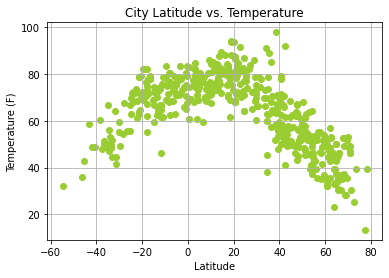

In [20]:
# Define x_axis
lat = clean_city_data["Latitude"]

# Plot
plt.scatter(lat, clean_city_data["Temperature (F)"], color = "yellowgreen")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs. Temperature")
plt.grid()
plt.savefig("Output/fig01.png")

## Latitude vs. Humidity Plot
* There doesn't seem to be a strong correlation between a city's latitude and level of humidity. Though there seems to be overall more cities with higher levels of humidity (>60%) in the early fall.

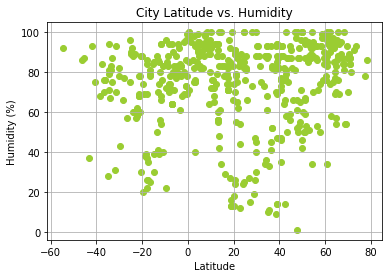

In [21]:
plt.scatter(lat, clean_city_data["Humidity (%)"], color = "yellowgreen")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.savefig("Output/fig02.png")

## Latitude vs. Cloudiness Plot
* There similarly doesn't seem to be much correlation between city latitude and level of cloudiness. The values for percent cloudiness seem to be clustered around round values (ie, 0, 20, 40, 90, 100)--this may indicate that it is difficult to get an accurate measure of cloudiness.

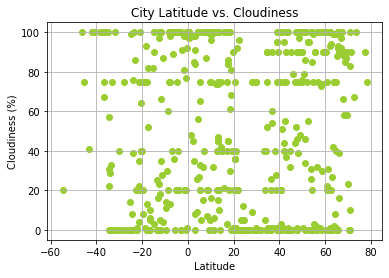

In [22]:
plt.scatter(lat, clean_city_data["Cloudiness (%)"], color = "yellowgreen")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()
plt.savefig("Output/fig03.png")

## Latitude vs. Wind Speed Plot
* There is no strong relationship between city latitude and wind speed. We can observe that most wind speeds for all cities fall under 20 mph.

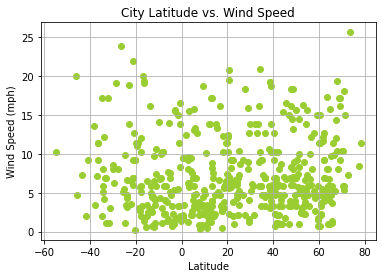

In [23]:
plt.scatter(lat, clean_city_data["Wind Speed (mph)"], color = "yellowgreen")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()
plt.savefig("Output/fig04.png")

## Linear Regression

####  Northern Hemisphere -  Latitude vs. Temp Linear Regression

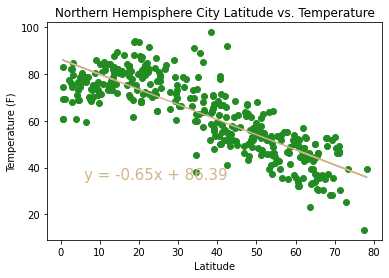

In [24]:
northern_cities = clean_city_data.loc[(clean_city_data["Latitude"]>=0),:]
nx_values = northern_cities["Latitude"]
n_temp = northern_cities["Temperature (F)"]

plt.scatter(nx_values, n_temp, color = "forestgreen")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Northern Hempisphere City Latitude vs. Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, n_temp)
regress_values = nx_values * slope + intercept
plt.plot(nx_values,regress_values,"r-", color = "tan")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(6,35),fontsize=15,color="tan")
plt.savefig("Output/fig05.png")

####  Southern Hemisphere - Latitude vs. Temp Linear Regression

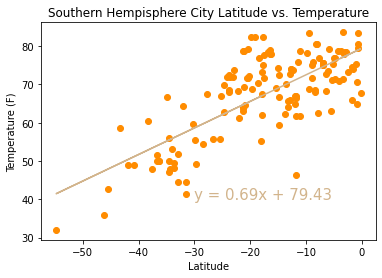

In [25]:
southern_cities = clean_city_data.loc[(clean_city_data["Latitude"]<0),:]
sx_values = southern_cities["Latitude"]
s_temp = southern_cities["Temperature (F)"]

plt.scatter(sx_values, s_temp, color = "darkorange")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Southern Hempisphere City Latitude vs. Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, s_temp)
regress_values = sx_values * slope + intercept
plt.plot(sx_values,regress_values,"r-", color = "tan")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(-30, 40),fontsize=15,color="tan")
plt.savefig("Output/fig06.png")

#### Latitude vs. Temperature Linear Regression Analysis
There is a moderately strong correlation between a city's distance from the equator--whether it be towards the north or the south--and the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

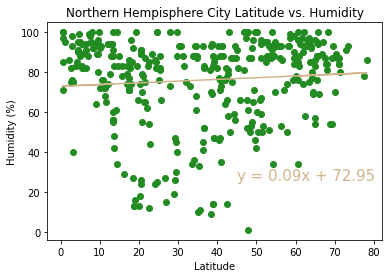

In [26]:
n_humidity = northern_cities["Humidity (%)"]

plt.scatter(nx_values, n_humidity, color = "forestgreen")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hempisphere City Latitude vs. Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, n_humidity)
regress_values = nx_values * slope + intercept
plt.plot(nx_values,regress_values,"r-", color = "tan")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(45, 26),fontsize=15,color="tan")
plt.savefig("Output/fig07.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

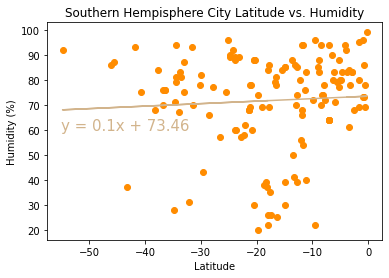

In [27]:
s_humidity = southern_cities["Humidity (%)"]

plt.scatter(sx_values, s_humidity, color = "darkorange")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hempisphere City Latitude vs. Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, s_humidity)
regress_values = sx_values * slope + intercept
plt.plot(sx_values,regress_values,"r-", color = "tan")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(-55, 60),fontsize=15,color="tan")
plt.savefig("Output/fig08.png")

#### Latitude vs. Humidity (%) Linear Regression Analysis
City latitude and percent humidity are very weakly correlated, regardless of whether the city is located in the northern or southern hemisphere.

####  Northern Hemisphere - Latitude vs. Cloudiness (%) Linear Regression

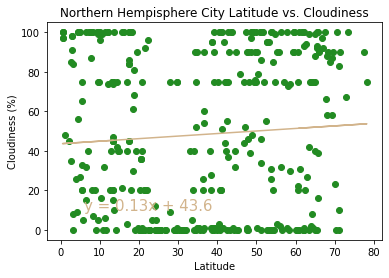

In [28]:
n_cloud = northern_cities["Cloudiness (%)"]

plt.scatter(nx_values, n_cloud, color = "forestgreen")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hempisphere City Latitude vs. Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, n_cloud)
regress_values = nx_values * slope + intercept
plt.plot(nx_values,regress_values,"r-", color = "tan")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(6,10),fontsize=15,color="tan")
plt.savefig("Output/fig09.png")

####  Southern Hemisphere - Latitude vs. Cloudiness (%) Linear Regression

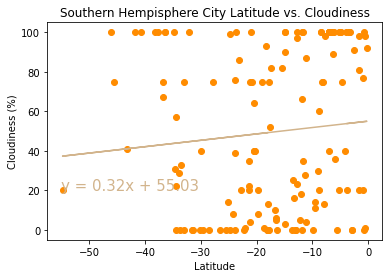

In [17]:
s_cloud = southern_cities["Cloudiness (%)"]

plt.scatter(sx_values, s_cloud, color = "darkorange")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hempisphere City Latitude vs. Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, s_cloud)
regress_values = sx_values * slope + intercept
plt.plot(sx_values,regress_values,"r-", color = "tan")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(-55, 20),fontsize=15,color="tan")
plt.savefig("Output/fig10.png")

#### Latitude vs. Cloudiness (%) Linear Regression Analysis
There is very low correlation between city latitude and percent cloudiness, thus it would difficult to gauge how cloudy a city is on a given day based on just it's location.

####  Northern Hemisphere - Latitude vs. Wind Speed (mph) Linear Regression

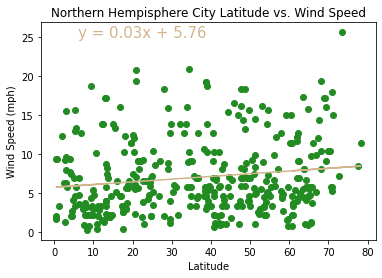

In [18]:
n_wind = northern_cities["Wind Speed (mph)"]

plt.scatter(nx_values, n_wind, color = "forestgreen")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hempisphere City Latitude vs. Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, n_wind)
regress_values = nx_values * slope + intercept
plt.plot(nx_values,regress_values,"r-", color = "tan")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(6,25),fontsize=15,color="tan")
plt.savefig("Output/fig11.png")

####  Southern Hemisphere - Latitude vs. Wind Speed (mph) Linear Regression

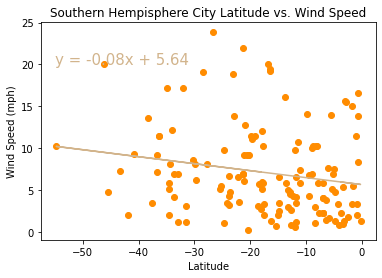

In [19]:
s_wind = southern_cities["Wind Speed (mph)"]

plt.scatter(sx_values, s_wind, color = "darkorange")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hempisphere City Latitude vs. Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, s_wind)
regress_values = sx_values * slope + intercept
plt.plot(sx_values,regress_values,"r-", color = "tan")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(-55, 20),fontsize=15,color="tan")
plt.savefig("Output/fig12.png")

#### Latitude vs. Wind Speed (mph) Linear Regression Analysis
Again, there relationship between a city's latitude and wind speed is depicted here to be weak. Wind speeds generally seem to fall uner 15 mph for all cities and cities with wind speeds over 15 mph follow no particular pattern with regards to their distance from the equator.